In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# df1_customer = pd.read_csv('1.1 고객기본정보(개인정보 제외)_추출.xlsx', encoding ='cp949')

df_customer1 = pd.read_excel (r'1.1 고객기본정보(개인정보 제외)_추출.xlsx')

In [2]:
df_customer1.tail()

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
50283,57789,일반,2018-11-07 08:57:25,2018-11-07 08:57:41,MOBILE,M,NaN,-,-
50284,57790,일반,2018-11-07 08:58:23,2018-11-07 08:58:38,NaN,-,NaN,-,-
50285,57791,일반,2018-11-07 09:33:48,2018-11-07 09:34:10,MOBILE,F,NaN,-,-
50286,57792,일반,2018-11-07 09:49:43,2018-11-07 09:49:43,NaN,-,NaN,-,-
50287,57793,일반,2018-11-07 10:06:54,2018-11-07 10:07:07,MOBILE,M,NaN,-,-


In [3]:
df_customer1.head()

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6
2,1874,임직원,2017-11-02 15:55:11,2018-11-07 07:27:31,MOBILE,M,39,경기 성남시 분당구 판교역로 4,경기 성남시 분당구 백현동 582-7
3,1875,임직원,2017-11-02 16:08:18,2018-11-05 08:35:48,MOBILE,F,29,서울 은평구 연서로34가길 10-16,서울 은평구 불광동 346-87
4,1876,임직원,2017-11-02 16:10:06,2018-11-06 14:51:02,MOBILE,M,30,서울 영등포구 국제금융로2길 32,서울 영등포구 여의도동 23-8


In [4]:
df_customer1.shape

(50288, 9)

In [5]:
df_customer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50288 entries, 0 to 50287
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   회원번호         50288 non-null  int64 
 1   회원등급         50288 non-null  object
 2   가입일          50288 non-null  object
 3   최종방문일        50288 non-null  object
 4   본인인증         43019 non-null  object
 5   성별           50288 non-null  object
 6   나이           32085 non-null  object
 7   자주쓰는배송지 도로명  50288 non-null  object
 8   자주쓰는배송지 지번   50288 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.5+ MB


In [6]:
df_customer1.isnull().sum()

회원번호               0
회원등급               0
가입일                0
최종방문일              0
본인인증            7269
성별                 0
나이             18203
자주쓰는배송지 도로명        0
자주쓰는배송지 지번         0
dtype: int64

In [7]:
df_customer1['본인인증'].isnull().value_counts()
# 본인 인증 미기입 : 7269명

False    43019
True      7269
Name: 본인인증, dtype: int64

In [8]:
df_customer1['나이'].isnull().value_counts()
# 나이 미 기입 : 18203명

False    32085
True     18203
Name: 나이, dtype: int64

# 결측치 처리
- 본인인증 : 미기입은 '정보 없음'으로 처리
- 나이 : 미기입은 '0'으로 처리

In [9]:
# 본인인증 미기입
df_customer1['본인인증'] = df_customer1['본인인증'].fillna('정보 없음')
df_customer1['본인인증'].unique()

array(['-', 'MOBILE', 'IPIN', '정보 없음', 'BTOB'], dtype=object)

In [10]:
# 나이 미기입
df_customer1['나이'] = df_customer1['나이'].fillna(0)
df_customer1['나이'].unique()

array(['31', '32', '39', '29', '30', '20', '23', '28', '38', '41', '36',
       '48', '24', '47', '26', '45', '44', '-', '58', '63', '21', '52',
       '35', '25', '34', '43', '50', '42', '37', '27', '40', '49', '53',
       '46', '54', '66', '55', '57', '56', '51', '33', '22', '61', '59',
       '65', '67', '68', '62', '60', '18', '64', '17', '69', '71', '19',
       '15', '16', '70', '13', '78', '73', '14', '79', '77', '85', '76',
       '74', '72', '80', '75', '8', '87', '100', '84', '12', '81', '82',
       '86', '83', '10', '90', '98', '9', '11', '95', '94', '88', '91',
       '89', 0], dtype=object)

In [11]:
df_customer1

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6
2,1874,임직원,2017-11-02 15:55:11,2018-11-07 07:27:31,MOBILE,M,39,경기 성남시 분당구 판교역로 4,경기 성남시 분당구 백현동 582-7
3,1875,임직원,2017-11-02 16:08:18,2018-11-05 08:35:48,MOBILE,F,29,서울 은평구 연서로34가길 10-16,서울 은평구 불광동 346-87
4,1876,임직원,2017-11-02 16:10:06,2018-11-06 14:51:02,MOBILE,M,30,서울 영등포구 국제금융로2길 32,서울 영등포구 여의도동 23-8
...,...,...,...,...,...,...,...,...,...
50283,57789,일반,2018-11-07 08:57:25,2018-11-07 08:57:41,MOBILE,M,0,-,-
50284,57790,일반,2018-11-07 08:58:23,2018-11-07 08:58:38,정보 없음,-,0,-,-
50285,57791,일반,2018-11-07 09:33:48,2018-11-07 09:34:10,MOBILE,F,0,-,-
50286,57792,일반,2018-11-07 09:49:43,2018-11-07 09:49:43,정보 없음,-,0,-,-


# 고객의 회원 등급
 - XX 온라인 쇼핑몰 회원의 등급은 3가지로 나뉨
 - 임직원, 일반, MRO(소모성자재구매)
 - 일반과 임직원이 대다수를 차지함

In [12]:
df_customer1['회원등급'].unique()

array(['임직원', '일반', 'MRO'], dtype=object)

In [13]:
df_customer1_member = df_customer1['회원등급'].value_counts()
df_customer1_member

일반     48472
임직원     1813
MRO        3
Name: 회원등급, dtype: int64

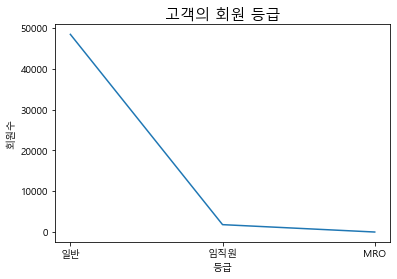

In [14]:
import matplotlib.pyplot as plt

x = df_customer1_member.index
y = df_customer1_member.values

plt.plot(x,y)
plt.title('고객의 회원 등급', size=15)
plt.xlabel('등급')
plt.ylabel('회원수')
plt.show()

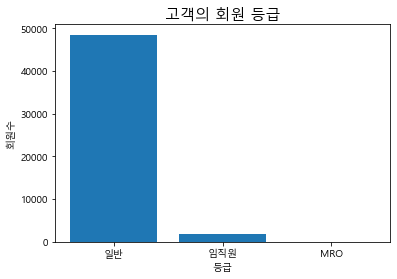

In [15]:
plt.bar(x,y)
plt.title('고객의 회원 등급', size=15)
plt.xlabel('등급')
plt.ylabel('회원수')
plt.show()

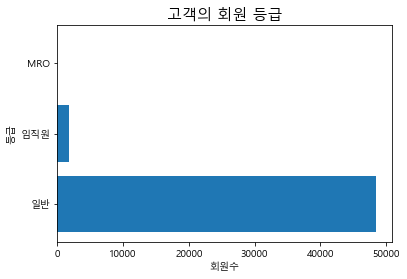

In [16]:
plt.barh(x,y)
plt.title('고객의 회원 등급', size=15)
plt.xlabel('회원수')
plt.ylabel('등급')
plt.show()

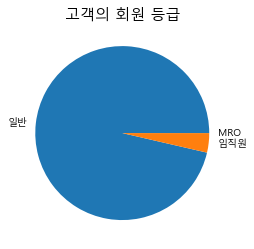

In [17]:
import matplotlib.pyplot as plt
import numpy as np

y = df_customer1_member.values
mylabels = df_customer1_member.index
plt.title('고객의 회원 등급', size=15)
plt.pie(y, labels = mylabels)
plt.show()

# 고객의 본인 인증
 - 인증 방법은 3가지로 나뉨
 - Mobile, IPIN, BTOB(Business-to-Business)
 - 본인인증에 대한 미기입 회원 수도 다수를 차지 함
 - BTOB 고객의 매출액 비중 확인 필요

In [18]:
df_customer1

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6
2,1874,임직원,2017-11-02 15:55:11,2018-11-07 07:27:31,MOBILE,M,39,경기 성남시 분당구 판교역로 4,경기 성남시 분당구 백현동 582-7
3,1875,임직원,2017-11-02 16:08:18,2018-11-05 08:35:48,MOBILE,F,29,서울 은평구 연서로34가길 10-16,서울 은평구 불광동 346-87
4,1876,임직원,2017-11-02 16:10:06,2018-11-06 14:51:02,MOBILE,M,30,서울 영등포구 국제금융로2길 32,서울 영등포구 여의도동 23-8
...,...,...,...,...,...,...,...,...,...
50283,57789,일반,2018-11-07 08:57:25,2018-11-07 08:57:41,MOBILE,M,0,-,-
50284,57790,일반,2018-11-07 08:58:23,2018-11-07 08:58:38,정보 없음,-,0,-,-
50285,57791,일반,2018-11-07 09:33:48,2018-11-07 09:34:10,MOBILE,F,0,-,-
50286,57792,일반,2018-11-07 09:49:43,2018-11-07 09:49:43,정보 없음,-,0,-,-


In [19]:
df_customer1['본인인증'].unique()

array(['-', 'MOBILE', 'IPIN', '정보 없음', 'BTOB'], dtype=object)

In [20]:
# 결측치 처리 : '-'
df_customer1['본인인증'] = df_customer1['본인인증'].replace('-', '정보 없음') 

In [21]:
df_customer1['본인인증'].unique()

array(['정보 없음', 'MOBILE', 'IPIN', 'BTOB'], dtype=object)

In [22]:
df_customer1

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,정보 없음,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6
2,1874,임직원,2017-11-02 15:55:11,2018-11-07 07:27:31,MOBILE,M,39,경기 성남시 분당구 판교역로 4,경기 성남시 분당구 백현동 582-7
3,1875,임직원,2017-11-02 16:08:18,2018-11-05 08:35:48,MOBILE,F,29,서울 은평구 연서로34가길 10-16,서울 은평구 불광동 346-87
4,1876,임직원,2017-11-02 16:10:06,2018-11-06 14:51:02,MOBILE,M,30,서울 영등포구 국제금융로2길 32,서울 영등포구 여의도동 23-8
...,...,...,...,...,...,...,...,...,...
50283,57789,일반,2018-11-07 08:57:25,2018-11-07 08:57:41,MOBILE,M,0,-,-
50284,57790,일반,2018-11-07 08:58:23,2018-11-07 08:58:38,정보 없음,-,0,-,-
50285,57791,일반,2018-11-07 09:33:48,2018-11-07 09:34:10,MOBILE,F,0,-,-
50286,57792,일반,2018-11-07 09:49:43,2018-11-07 09:49:43,정보 없음,-,0,-,-


In [23]:
df_customer1_verification = df_customer1['본인인증'].value_counts()
df_customer1_verification

MOBILE    41528
정보 없음      7270
IPIN       1486
BTOB          4
Name: 본인인증, dtype: int64

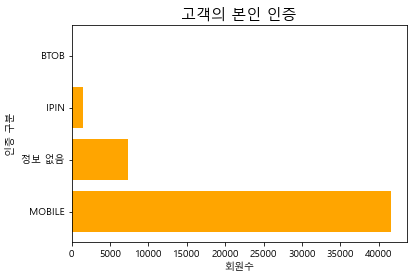

In [24]:
import matplotlib.pyplot as plt

x = df_customer1_verification.index
y = df_customer1_verification.values

plt.barh(x,y, color = 'orange')
plt.title('고객의 본인 인증', size=15)
plt.xlabel('회원수')
plt.ylabel('인증 구분')
plt.show()

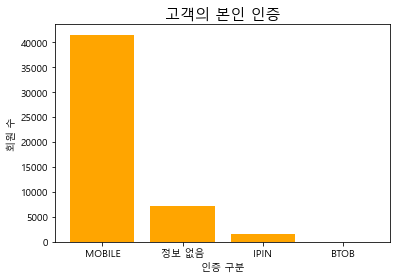

In [25]:
import matplotlib.pyplot as plt

x = df_customer1_verification.index
y = df_customer1_verification.values

plt.bar(x,y, color = 'orange')
plt.title('고객의 본인 인증', size=15)
plt.xlabel('인증 구분')
plt.ylabel('회원 수')
plt.show()

# 고객의 성별 분포 
- 남자 고객 수가 많음
- 고객의 성별이 파악되지 않는 건수도 상당 수 있음

In [26]:
df_customer1['성별'].unique()

array(['M', 'F', '-'], dtype=object)

In [27]:
# 결측치 처리 : '-'
df_customer1['성별'] = df_customer1['성별'].replace('-', '정보 없음') 

In [28]:
df_customer1_gender = df_customer1['성별'].value_counts()
df_customer1_gender

M        24088
F        17691
정보 없음     8509
Name: 성별, dtype: int64

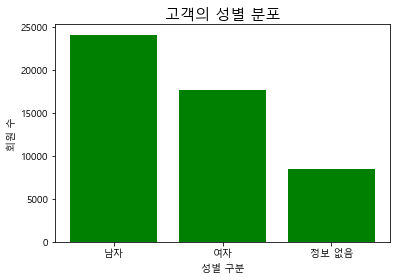

In [29]:
import matplotlib.pyplot as plt

x = df_customer1_gender.index
y = df_customer1_gender.values

plt.bar(x,y, color = 'green')
plt.xticks([0, 1, 2], ['남자', '여자', '정보 없음'])
plt.title('고객의 성별 분포', size=15)
plt.xlabel('성별 구분')
plt.ylabel('회원 수')
plt.show()

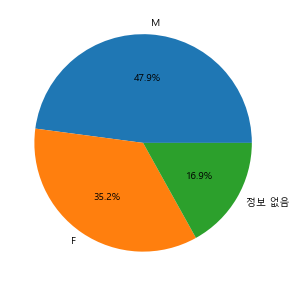

In [30]:
plt.rcParams['figure.figsize']=(15,5)

labels = df_customer1_gender.index
size = df_customer1_gender.values

plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.show()

# 고객의 연령 분포
- 상당 수의 고객의 연령 미파악 됨

In [31]:
df_customer1['나이'].unique()

array(['31', '32', '39', '29', '30', '20', '23', '28', '38', '41', '36',
       '48', '24', '47', '26', '45', '44', '-', '58', '63', '21', '52',
       '35', '25', '34', '43', '50', '42', '37', '27', '40', '49', '53',
       '46', '54', '66', '55', '57', '56', '51', '33', '22', '61', '59',
       '65', '67', '68', '62', '60', '18', '64', '17', '69', '71', '19',
       '15', '16', '70', '13', '78', '73', '14', '79', '77', '85', '76',
       '74', '72', '80', '75', '8', '87', '100', '84', '12', '81', '82',
       '86', '83', '10', '90', '98', '9', '11', '95', '94', '88', '91',
       '89', 0], dtype=object)

In [32]:
# 결측치 처리 : '-'
df_customer1['나이'] = df_customer1['나이'].replace('-', 0) 

In [33]:
df_customer1['나이'].unique()

array(['31', '32', '39', '29', '30', '20', '23', '28', '38', '41', '36',
       '48', '24', '47', '26', '45', '44', 0, '58', '63', '21', '52',
       '35', '25', '34', '43', '50', '42', '37', '27', '40', '49', '53',
       '46', '54', '66', '55', '57', '56', '51', '33', '22', '61', '59',
       '65', '67', '68', '62', '60', '18', '64', '17', '69', '71', '19',
       '15', '16', '70', '13', '78', '73', '14', '79', '77', '85', '76',
       '74', '72', '80', '75', '8', '87', '100', '84', '12', '81', '82',
       '86', '83', '10', '90', '98', '9', '11', '95', '94', '88', '91',
       '89'], dtype=object)

In [34]:
# 자료형 변환 (string -> integer)
df_customer1['나이'] = df_customer1['나이'].astype('float64')
df_customer1['나이'] = df_customer1['나이'].astype('int')
df_customer1['나이'].unique()

array([ 31,  32,  39,  29,  30,  20,  23,  28,  38,  41,  36,  48,  24,
        47,  26,  45,  44,   0,  58,  63,  21,  52,  35,  25,  34,  43,
        50,  42,  37,  27,  40,  49,  53,  46,  54,  66,  55,  57,  56,
        51,  33,  22,  61,  59,  65,  67,  68,  62,  60,  18,  64,  17,
        69,  71,  19,  15,  16,  70,  13,  78,  73,  14,  79,  77,  85,
        76,  74,  72,  80,  75,   8,  87, 100,  84,  12,  81,  82,  86,
        83,  10,  90,  98,   9,  11,  95,  94,  88,  91,  89])

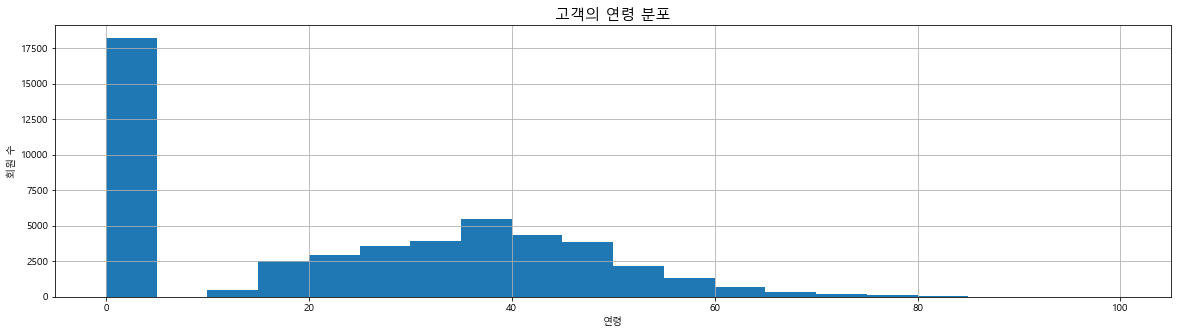

In [35]:
plt.rcParams['figure.figsize']=(20,5)

df_customer1_age = df_customer1['나이']
df_customer1_age.hist(bins=20)

plt.title('고객의 연령 분포', size=15)
plt.xlabel('연령')
plt.ylabel('회원 수')
plt.show()

In [36]:
df_customer1['나이'].median()

26.0